In [3]:
from sklearn.metrics import confusion_matrix
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K
import matplotlib.pyplot as plt


In [4]:
batch_size = 128
num_classes = 10
epochs = 5

# input image dimensions
img_rows, img_cols = 28, 28

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [9]:
x_train.shape

(60000, 784)

Text(0.5, 1.0, '3')

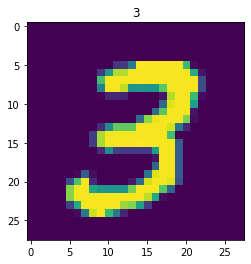

In [10]:
img=x_train[7]
img=img.reshape((28,28))
plt.imshow(img)
plt.title(y_train[7])

In [11]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [12]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

In [16]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 8s 15ms/step - loss: 0.5645 - accuracy: 0.8440 - val_loss: 0.1226 - val_accuracy: 0.9607
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1023 - accuracy: 0.9691 - val_loss: 0.0928 - val_accuracy: 0.9709
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0622 - accuracy: 0.9806 - val_loss: 0.0777 - val_accuracy: 0.9764
Epoch 4/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0400 - accuracy: 0.9876 - val_loss: 0.0790 - val_accuracy: 0.9775
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.0898 - val_accuracy: 0.9743
Epoch 6/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0283 - accuracy: 0.9909 - val_loss: 0.0812 - val_accuracy: 0.9780
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0195 - accuracy: 0.9944 - val_loss: 0.0727 - val_accuracy: 0.9806

In [24]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print("Test accuracy:",score[1])

Test loss: 0.07647998631000519
Test accuracy: 0.9805999994277954


In [22]:
res = model.predict_classes(x_test)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
Submitted by : Ramasubramanian L
Mail id : smartsree670@gmail.com
mobile number : 7094858229